## 목차
* [참고문서](#reference)
* [데이터 로드](#load-data)
* [데이터 확인](#select-data)

## 참고문서<a id="reference"></a>

## 데이터 로드<a id="load-data"></a>

In [13]:
from keras.datasets import reuters

# 등장 빈도 순위 1~100위에 해당하는 단어만 사용
# x: 뉴스에 대한 단어 tokenizer가 완료된 데이터셋
# y: 뉴스 카테고리
# 테스트 데이터셋은 20%만 split
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

print('훈련 데이터셋', len(X_train))
print('테스트 데이터셋', len(X_test))
# 분류가 0부터 시작하기때문에 +1을 해주었다.
print('분류', max(Y_train)+1)

훈련 데이터셋 8982
테스트 데이터셋 2246
분류 46


## 데이터 확인<a id="select-data"></a>

최대 길이 2376
평균 길이 146


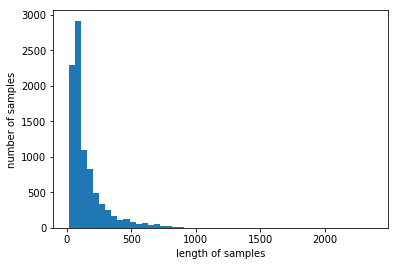

In [2]:
print('최대 길이 {}'.format(max(len(word) for word in x_train)))
print('평균 길이 {}'.format(round(sum(map(len, x_train))/len(x_train))))

import matplotlib.pyplot as plt
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## 모델

In [18]:
from keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical

# 데이터 전처리
max_len = 100
x_train = sequence.pad_sequences(X_train, maxlen=max_len)
x_test = sequence.pad_sequences(X_test, maxlen=max_len)

# 원-핫 인코딩
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 45s 5ms/sample - loss: 2.6165 - acc: 0.3467 - val_loss: 2.4151 - val_acc: 0.3620
Epoch 2/20
8982/8982 [==============================] - 45s 5ms/sample - loss: 2.1893 - acc: 0.4373 - val_loss: 2.0400 - val_acc: 0.4898
Epoch 3/20
8982/8982 [==============================] - 44s 5ms/sample - loss: 1.9651 - acc: 0.5048 - val_loss: 1.8624 - val_acc: 0.5209
Epoch 4/20
8982/8982 [==============================] - 44s 5ms/sample - loss: 1.7709 - acc: 0.5404 - val_loss: 1.7419 - val_acc: 0.5401
Epoch 5/20
8982/8982 [==============================] - 44s 5ms/sample - loss: 1.6839 - acc: 0.5651 - val_loss: 1.7125 - val_acc: 0.5650
Epoch 6/20
8982/8982 [==============================] - 45s 5ms/sample - loss: 1.6178 - acc: 0.5789 - val_loss: 1.6145 - val_acc: 0.5988
Epoch 7/20
8982/8982 [==============================] - 46s 5ms/sample - loss: 1.5170 - acc: 0.6150 - val_loss: 1.5283 - val_acc: 

In [20]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

2246/2246 [==============================] - 6s 3ms/sample - loss: 1.2013 - acc: 0.7142

 Test Accuracy: 0.7142


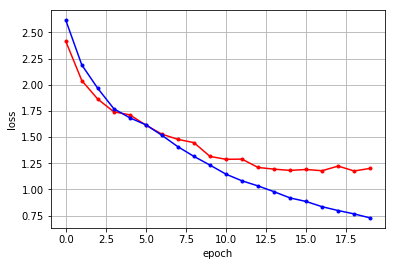

In [22]:
import numpy

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
  

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()